In [2]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = [10, 6]

# Analiza dynamiki fiksacji
## Analiza A - dynamika w funkcji wybranej odpowiedzi

In [3]:
Lmin = 0
Lmax = 24
WINDOW_SIZE = 5
results = join('..', 'results', 'results_window_5')

In [4]:
### Wszystkie triale
full = pd.read_csv(join(results, 'dynamics_full.csv'))
corr = pd.read_csv(join(results, 'dynamics_corr.csv'))
err = pd.read_csv(join(results, 'dynamics_err.csv'))
lev_easy = pd.read_csv(join(results, 'dynamics_lev_easy.csv'))
lev_med = pd.read_csv(join(results, 'dynamics_lev_med.csv'))
lev_hard = pd.read_csv(join(results, 'dynamics_lev_hard.csv'))
wmc_low = pd.read_csv(join(results, 'dynamics_wmc_low.csv'))
wmc_med = pd.read_csv(join(results, 'dynamics_wmc_med.csv'))
wmc_high = pd.read_csv(join(results, 'dynamics_wmc_high.csv'))

CI_corr = pd.read_csv(join(results, 'dynamics_CI_corr.csv'))
CI_err = pd.read_csv(join(results, 'dynamics_CI_err.csv'))
CI_full = pd.read_csv(join(results, 'dynamics_CI_full.csv'))
CI_lev_easy = pd.read_csv(join(results, 'dynamics_CI_lev_easy.csv'))
CI_lev_med = pd.read_csv(join(results, 'dynamics_CI_lev_med.csv'))
CI_lev_hard = pd.read_csv(join(results, 'dynamics_CI_lev_hard.csv'))

# Divide PROP by WINDOW SIZE, TO MAKE IT PROPORTIONAL 
full['PROP_FOx'] /= WINDOW_SIZE
corr['PROP_FOx'] /= WINDOW_SIZE
err['PROP_FOx'] /= WINDOW_SIZE
lev_easy['PROP_FOx'] /= WINDOW_SIZE
lev_med['PROP_FOx'] /= WINDOW_SIZE
lev_hard['PROP_FOx'] /= WINDOW_SIZE
wmc_low['PROP_FOx'] /= WINDOW_SIZE
wmc_med['PROP_FOx'] /= WINDOW_SIZE
wmc_high['PROP_FOx'] /= WINDOW_SIZE

CI_corr['FOx_STD'] /= WINDOW_SIZE
CI_full['FOx_STD'] /= WINDOW_SIZE
CI_err['FOx_STD'] /= WINDOW_SIZE
CI_lev_easy['FOx_STD'] /= WINDOW_SIZE
CI_lev_med['FOx_STD'] /= WINDOW_SIZE
CI_lev_hard['FOx_STD'] /= WINDOW_SIZE

full['FOx_STD'] /= WINDOW_SIZE
corr['FOx_STD'] /= WINDOW_SIZE
err['FOx_STD'] /= WINDOW_SIZE
lev_easy['FOx_STD'] /= WINDOW_SIZE
lev_med['FOx_STD'] /= WINDOW_SIZE
lev_hard['FOx_STD'] /= WINDOW_SIZE
wmc_low['FOx_STD'] /= WINDOW_SIZE
wmc_med['FOx_STD'] /= WINDOW_SIZE
wmc_high['FOx_STD'] /= WINDOW_SIZE

# Predziały ufności
1.96 razy odchylenie standardowe danej miary (tzn. albo PROP_FO albo AVG_RM) podzielone przez pierwiastek kwadratowy z liczby triali dla tej sekundy (czyli Kx): 1.96*(SDx/SQRT(Kx)) [inaczej 1.96 razy błąd standardowy miary w danej sekundzie].

In [5]:
def add_CI(data, param, corr = None):
    N = {'PROP_FOx': 'Kx', 'AVG_RMx': 'RMk'}[param]
    STD = {'PROP_FOx': 'FOx_STD', 'AVG_RMx': 'RMx_STD'}[param]
    if not (corr is None):
        data[param + '_low_CI'] = data[param] - (1.96 * corr[STD] / np.sqrt(corr[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * corr[STD] / np.sqrt(corr[N]))
    else:
        data[param + '_low_CI'] = data[param] - (1.96 * data[STD] / np.sqrt(data[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * data[STD] / np.sqrt(data[N]))
      
        
# def add_CI_PROP(data):
#     data["PROP_FOx_low_CI"] = data['PROP_FOx'] -  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
#     data["PROP_FOx_high_CI"] = data["PROP_FOx"] +  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    
# def add_CI_RM(data):
#     data["AVG_RMx_low_CI"] = data['AVG_RMx'] -  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
#     data["AVG_RMx_high_CI"] = data['AVG_RMx'] +  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    
def plot_CI(data, param,labels, title):
    # Define a function for the line plot with intervals
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot([x * WINDOW_SIZE for x in data[0][param].index.tolist()],
            data[0][param].tolist(), 
            lw = 1,
            color = 'green',
            alpha = 1,
            label = labels[0])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[0][param].index.tolist()],
                    data[0][param+"_low_CI"],
                    data[0][param+"_high_CI"], 
                    color = 'green',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot([x * WINDOW_SIZE for x in data[1][param].index.tolist()],
            data[1][param].tolist(), 
            lw = 1,
            color = '#539caf',
            alpha = 1,
            label = labels[1])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[1][param].index.tolist()],
                    data[1][param+"_low_CI"],
                    data[1][param+"_high_CI"], 
                    color = '#539caf',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot([x * WINDOW_SIZE for x in data[2][param].index.tolist()],
            data[2][param].tolist(), 
            lw = 1,
            color = 'red',
            alpha = 1,
            label = labels[2])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[2][param].index.tolist()],
                    data[2][param+"_low_CI"],
                    data[2][param+"_high_CI"], 
                    color = 'red',
                    alpha = 0.4,
                    label = '95% CI')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel('Time of experiment(s)')
    ax.set_ylabel(param)
    ax.set_xlim([Lmin,WINDOW_SIZE * (Lmax-1)])
#     ax.set_ylim([0,1])

        # Display legend
    ax.legend(loc = 'best')


# WMC 

## PROP_FOx

In [6]:
add_CI(wmc_low, 'PROP_FOx')
add_CI(wmc_med, 'PROP_FOx')
add_CI(wmc_high, 'PROP_FOx')

<IPython.core.display.Javascript object>


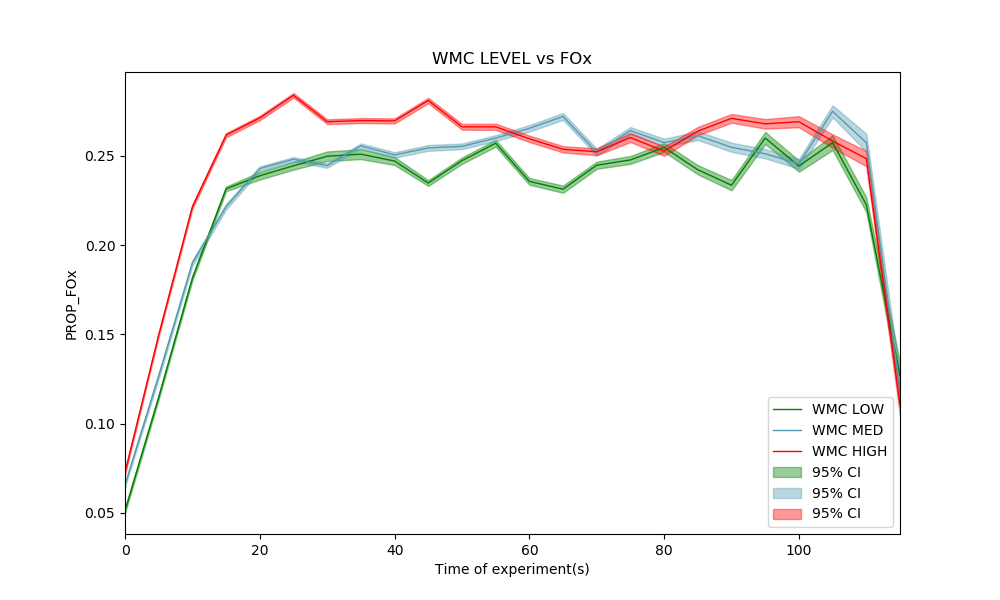

In [7]:
plot_CI([wmc_low, wmc_med, wmc_high], 'PROP_FOx', ['WMC LOW', 'WMC MED', 'WMC HIGH'], 'WMC LEVEL vs FOx')

## RM

In [8]:
# add_CI_RM(wmc_low)
# add_CI_RM(wmc_med)
# add_CI_RM(wmc_high)

add_CI(wmc_low, 'AVG_RMx')
add_CI(wmc_med, 'AVG_RMx')
add_CI(wmc_high, 'AVG_RMx')

<IPython.core.display.Javascript object>


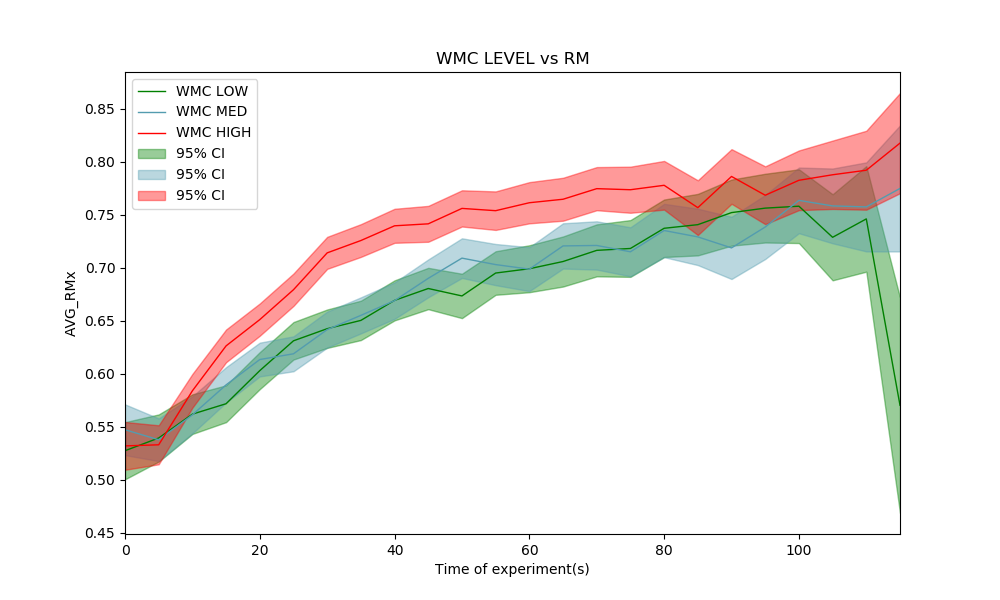

In [9]:
plot_CI([wmc_low, wmc_med, wmc_high], 'AVG_RMx', ['WMC LOW', 'WMC MED', 'WMC HIGH'], 'WMC LEVEL vs RM')

# LEVEL

## PROP_FOx

In [10]:
add_CI(lev_easy, 'PROP_FOx', corr = CI_lev_easy)
add_CI(lev_med,'PROP_FOx', corr = CI_lev_med)
add_CI(lev_hard,'PROP_FOx', corr = CI_lev_hard)

<IPython.core.display.Javascript object>


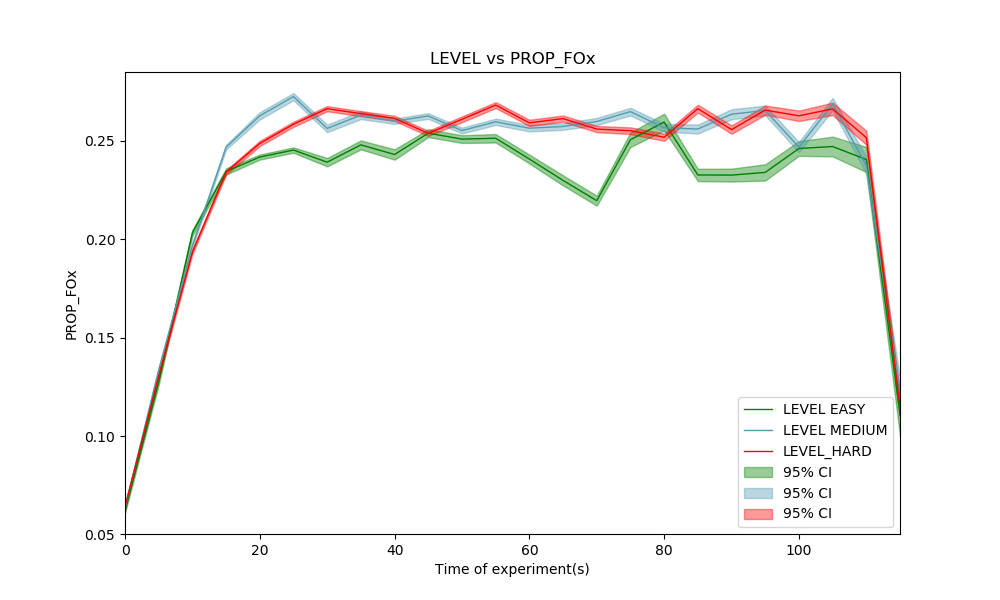

In [11]:
plot_CI([lev_easy, lev_med, lev_hard], 'PROP_FOx', ['LEVEL EASY', 'LEVEL MEDIUM', 'LEVEL_HARD'], 'LEVEL vs PROP_FOx')

## RM

In [12]:
add_CI(lev_easy, 'AVG_RMx', corr = CI_lev_easy)
add_CI(lev_med, 'AVG_RMx', corr = CI_lev_med)
add_CI(lev_hard, 'AVG_RMx', corr= CI_lev_hard)

<IPython.core.display.Javascript object>


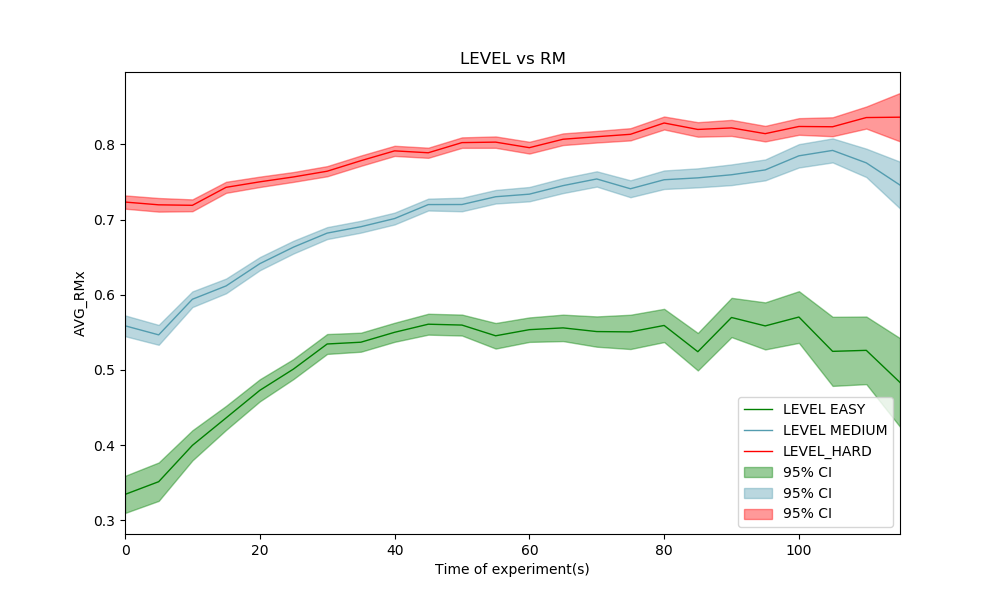

In [13]:
plot_CI([lev_easy, lev_med, lev_hard], 'AVG_RMx', ['LEVEL EASY', 'LEVEL MEDIUM', 'LEVEL_HARD'], 'LEVEL vs RM')

# FULL

## PROP_FOx

In [14]:
add_CI(full,'PROP_FOx', corr = CI_full)
add_CI(corr,'PROP_FOx', corr = CI_corr)
add_CI(err,'PROP_FOx', corr = CI_err)

<IPython.core.display.Javascript object>


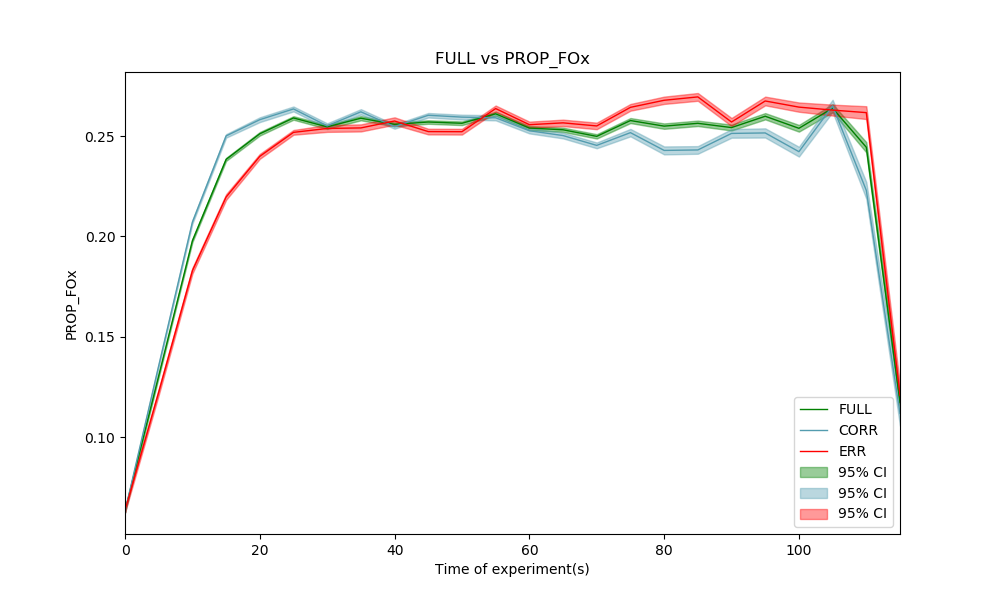

In [15]:
plot_CI([full, corr, err], 'PROP_FOx', ['FULL', 'CORR', 'ERR'], 'FULL vs PROP_FOx')

## RM

In [16]:
add_CI(full, 'AVG_RMx', corr = CI_full)
add_CI(corr, 'AVG_RMx', corr = CI_corr)
add_CI(err, 'AVG_RMx', corr = CI_err)

<IPython.core.display.Javascript object>


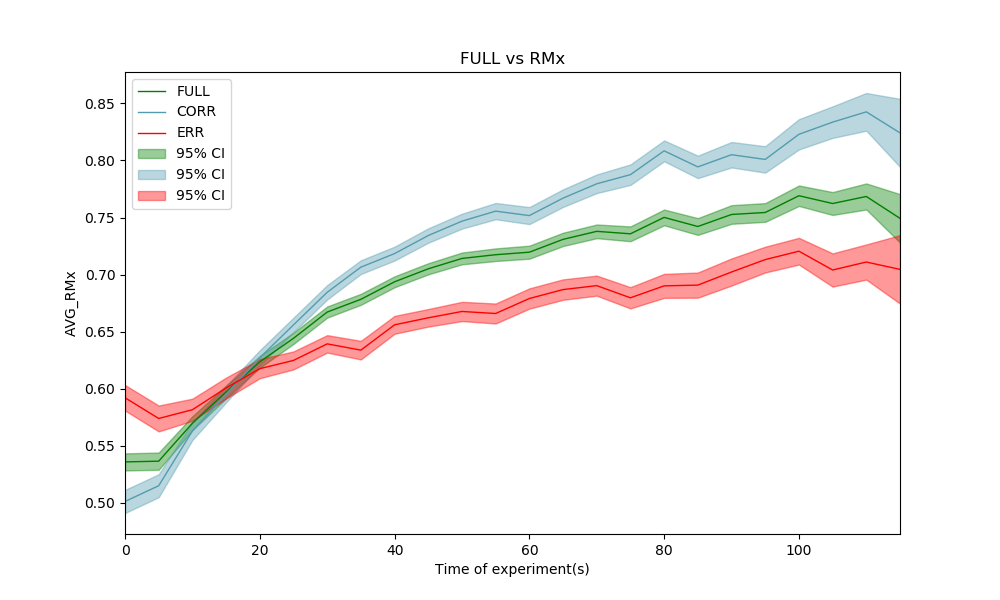

In [17]:
plot_CI([full, corr, err], 'AVG_RMx', ['FULL', 'CORR', 'ERR'], 'FULL vs RMx')